In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
pip install pycaret

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape,df_test.shape)

(31552, 21) (13659, 20)


In [ ]:
df_train.drop(['Employer','Favourite Sport'],inplace=True,axis=1)
df_test.drop(['Employer','Favourite Sport'],inplace=True,axis=1)

In [ ]:
oc = df_train.dtypes == 'object'
object_cols = list(oc[oc].index)
print(object_cols)

['Role', 'Invested in Real Estate', 'Extra Hours', 'Invested in Stock Market', 'Gender', 'Level of Education', 'ID Proof']


In [ ]:
nc = df_train.dtypes != 'object'
num_cols = list(nc[nc].index)
print(num_cols)

['Languages Known', 'Sport Knowledge (in XP)', 'Average no. of leaves/month', 'Trades Done', 'Married(1/0)', 'Occupation', 'Pay', 'Most Productive Hour', 'Tax Category', 'Income Category', 'Tax Paid', 'Id']


In [ ]:
#plot the correlation matrix
plt.figure(figsize=(12,10))
corr_mat = df_train.corr()
sns.heatmap(corr_mat,annot= True)
plt.show()

In [ ]:
df_train['Married(1/0)'].replace({-1:df_train['Married(1/0)'].mode()[0]},inplace=True)

In [ ]:
df_test['Married(1/0)'].replace({-1:df_train['Married(1/0)'].mode()[0]},inplace=True)

In [ ]:
print(df_train.shape,df_test.shape)

(31552, 19) (13659, 18)


Numerical Features


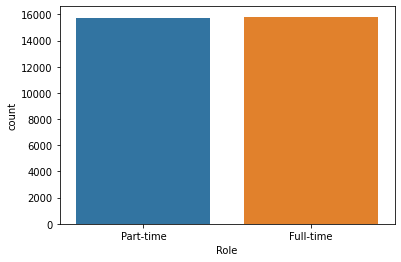

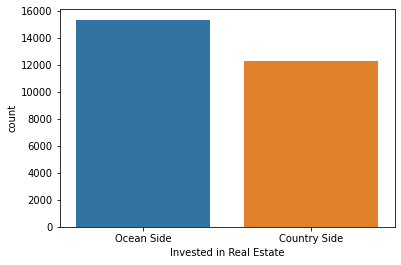

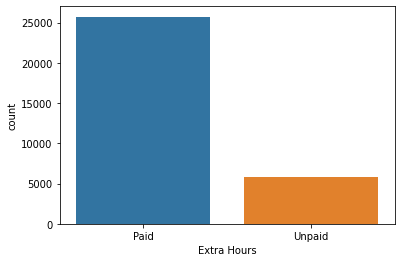

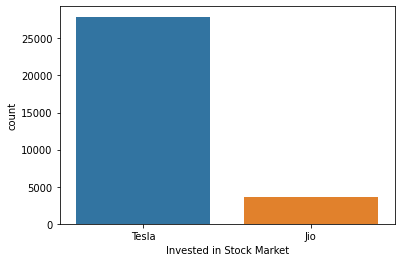

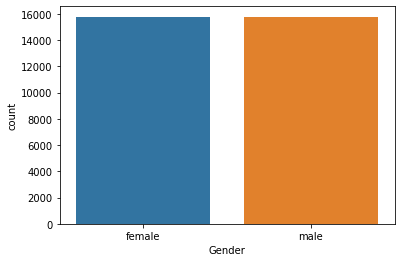

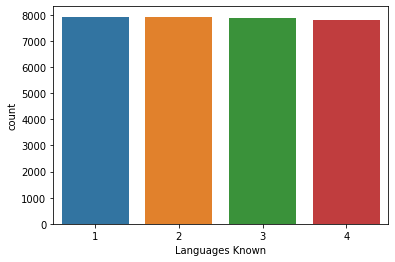

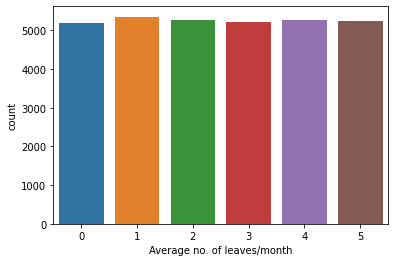

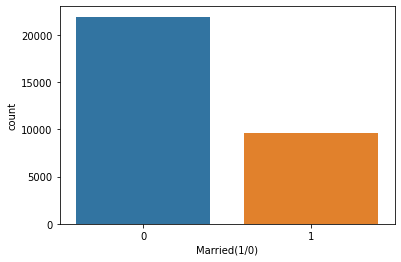

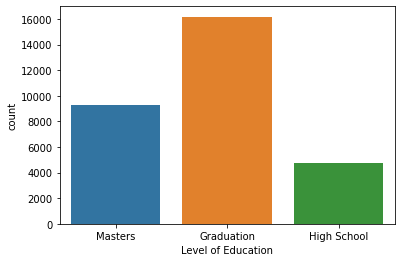

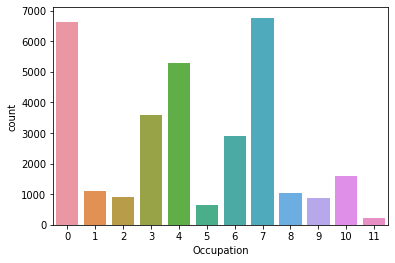

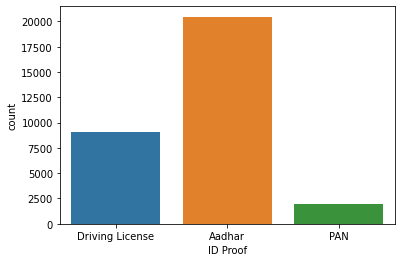

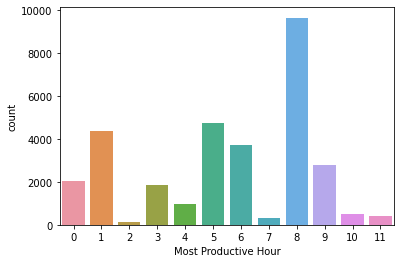

In [ ]:
my_list = [i for i in df_train.columns if df_train[i].nunique()<20]
for i in my_list:
    sns.countplot(x=i, data=df_train)
    plt.show(np)
    print("\n")

count    26093.000000
mean         4.350324
std          3.024877
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         11.000000
Name: Occupation, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


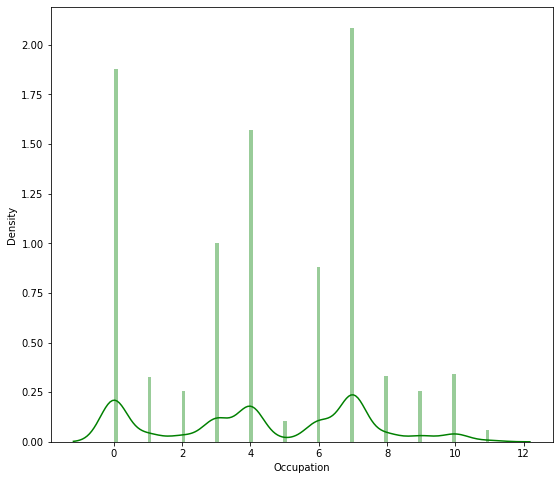

In [ ]:
print(df_train['Occupation'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['Occupation'], color='g', bins=100);

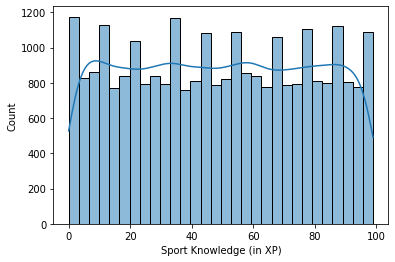

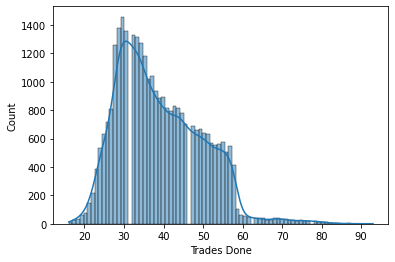

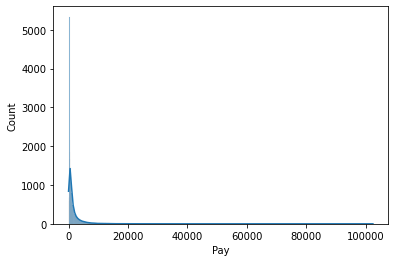

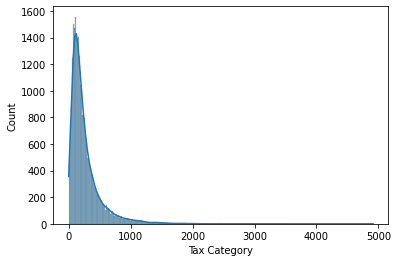

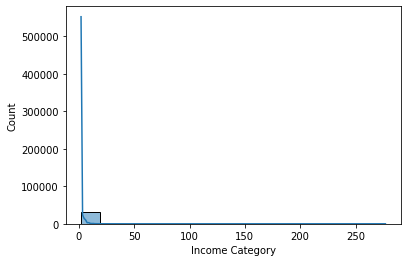

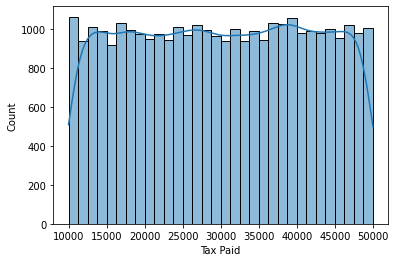

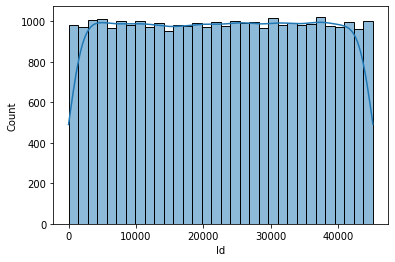

In [ ]:
#plot distributon of numerical cols whose nuniqe() > 20
for i in num_cols:
  if i not in my_list:
    sns.histplot(data=df_train,x=i,kde=True)
    plt.show()

#income category, tax, pay are skewed

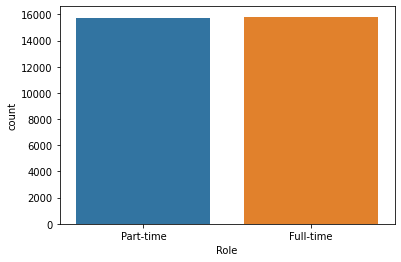

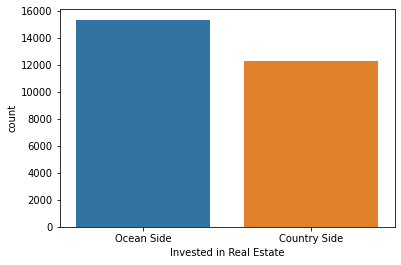

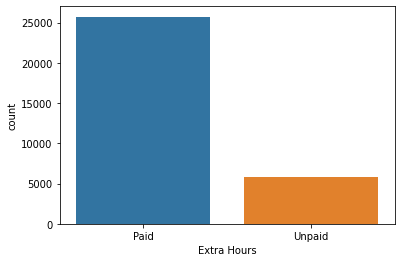

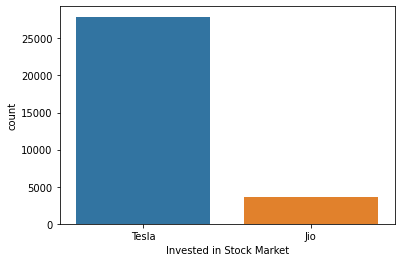

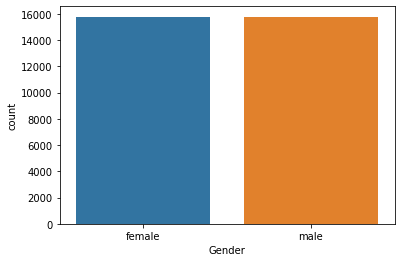

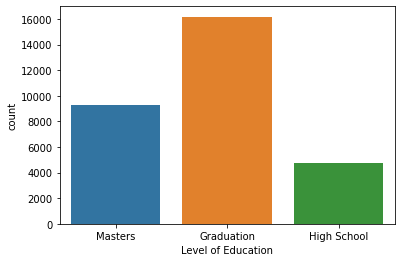

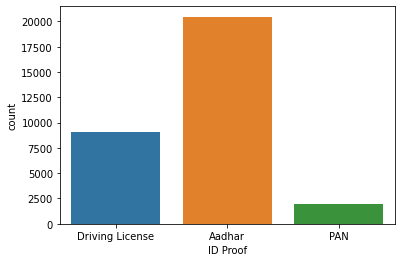

In [ ]:
#categorical features
for cat in object_cols:
  sns.countplot(data=df_train,x=cat)
  plt.show()

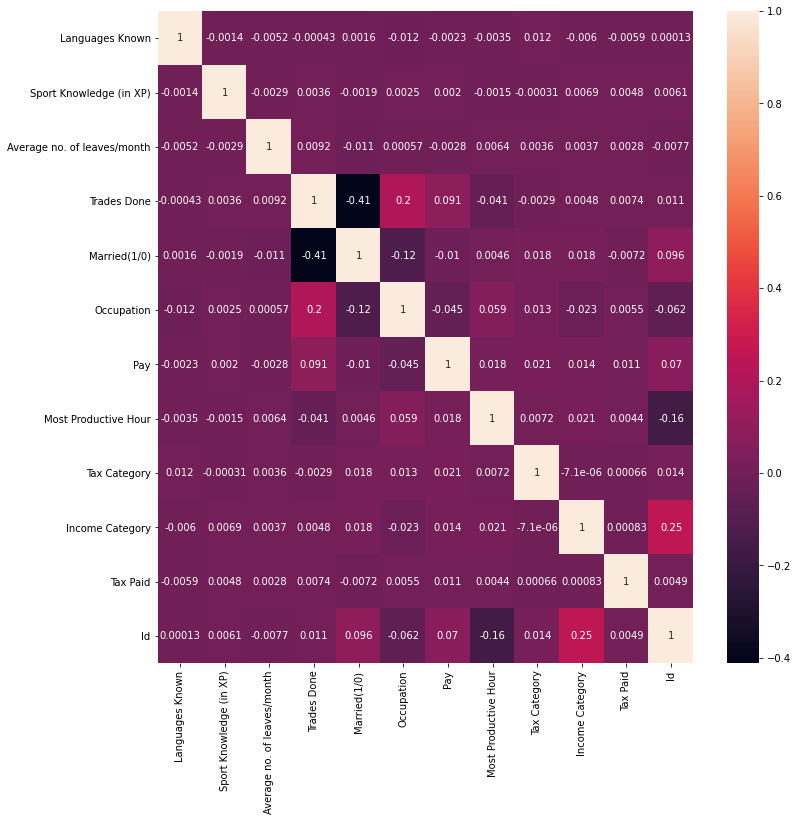

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_train[num_cols].corr(), annot=True)

In [ ]:
corr_mat = df_train[num_cols].corr()
corr_target = abs(corr_mat['Occupation'])
selected_features = corr_target[corr_target>0.01]
selected_features

Languages Known         0.011651
Trades Done             0.203208
Married(1/0)            0.121544
Occupation              1.000000
Pay                     0.044573
Most Productive Hour    0.058609
Tax Category            0.013420
Income Category         0.022607
Id                      0.062205
Name: Occupation, dtype: float64

In [ ]:
for i in object_cols:
  ctab = pd.crosstab(df_train[i],df_train['Occupation'])
  print("Chi square test between {} and Occupation is {}".format(i,stats.chi2_contingency(np.array(ctab))[1]))
  print("\n")

#drop Favourite Sport,Average no. of leaves/month,Role

Chi square test between Role and Occupation is 0.6754170046492531


Chi square test between Invested in Real Estate and Occupation is 0.0


Chi square test between Extra Hours and Occupation is 4.313280092011534e-60


Chi square test between Invested in Stock Market and Occupation is 6.471944536937114e-121


Chi square test between Gender and Occupation is 0.666107254574795


Chi square test between Level of Education and Occupation is 0.0


Chi square test between ID Proof and Occupation is 1.1320277101468867e-296




In [ ]:
to_select = ['Invested in Real Estate','Extra Hours','Invested in Stock Market ',
             'Languages Known','Trades Done','Married(1/0)','Level of Education',
             'Occupation','Pay','ID Proof','Most Productive Hour','Tax Category','Income Category','Id']
to_drop = []
for cols in df_train.columns:
  if cols not in to_select:
    to_drop.append(cols)

print(to_drop)

['Role', 'Invested in Stock Market', 'Gender', 'Sport Knowledge (in XP)', 'Average no. of leaves/month', 'Tax Paid']


In [ ]:
print(df_train.shape,df_test.shape)

(31552, 19) (13659, 18)


In [ ]:
X_train = df_train.drop(to_drop,axis=1).copy()
X_test = df_test.drop(to_drop,axis=1).copy()

In [ ]:
print(X_train.shape,X_test.shape)

(31552, 13) (13659, 12)


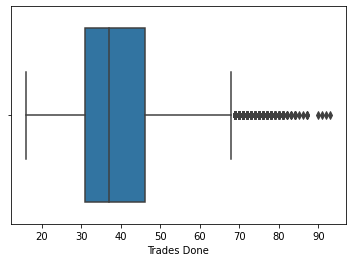

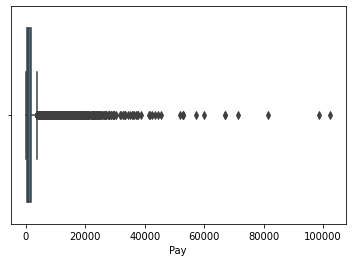

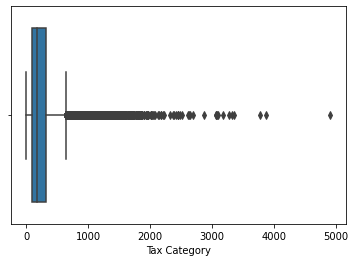

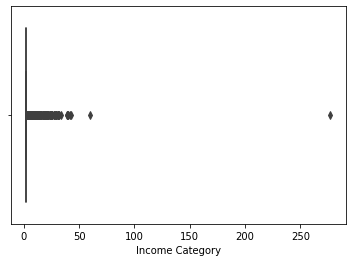

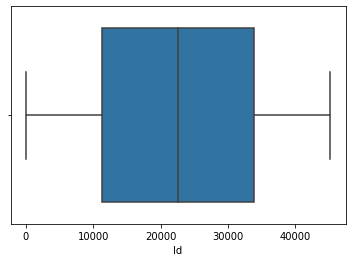

In [ ]:
for cols in num_cols:
  if cols not in to_drop and cols not in my_list:
    sns.boxplot(data=X_train,x=cols,hue='Occupation')
    plt.show()

In [ ]:
#removing the outliers 
my_cols = []
for cols in num_cols:
  if cols not in my_list and cols not in to_drop:
    my_cols.append(cols)
print(my_cols)

['Trades Done', 'Pay', 'Tax Category', 'Income Category', 'Id']


In [ ]:
range_lst = []
for i in my_cols:
  q25, q75 = X_train[i].quantile(0.25), X_train[i].quantile(0.75)
  iqr = q75-q25
  cut_off = iqr*1.5
  lower, upper = q25-cut_off, q75+cut_off
  range_lst.append((lower, upper))

print(range_lst)

[(8.5, 68.5), (-1678.145, 3742.855), (-225.5, 642.5), (2.0, 2.0), (-22705.0, 67865.0)]


In [ ]:
X_train = X_train[X_train['Trades Done'] > range_lst[0][0]]
X_train = X_train[X_train['Trades Done'] < range_lst[0][1]]

In [ ]:
X_train = X_train[X_train['Pay'] > range_lst[1][0]]
X_train = X_train[X_train['Pay'] < range_lst[1][1]]

In [ ]:
X_train = X_train[X_train['Tax Category'] > range_lst[2][0]]
X_train = X_train[X_train['Tax Category'] < range_lst[2][1]]

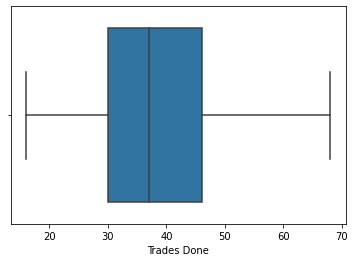

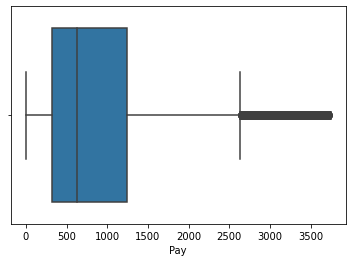

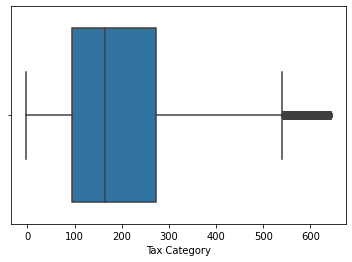

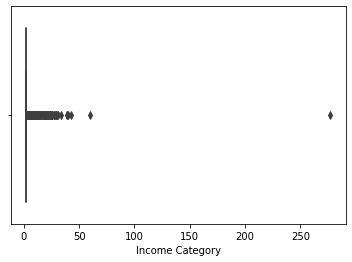

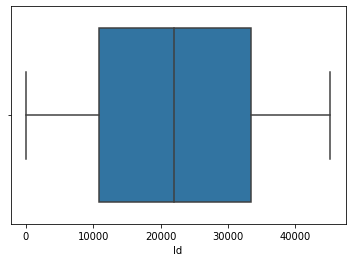

In [ ]:
for cols in my_cols:
  sns.boxplot(data=X_train,x=cols)
  plt.show()

In [ ]:
print(X_train.shape,X_test.shape)

(24532, 13) (13659, 12)


In [ ]:
X_train.columns

Index(['Invested in Real Estate', 'Extra Hours', 'Languages Known',
       'Trades Done', 'Married(1/0)', 'Level of Education', 'Occupation',
       'Pay', 'ID Proof', 'Most Productive Hour', 'Tax Category',
       'Income Category', 'Id'],
      dtype='object')

In [ ]:
df_train_,X_test_ = X_train.copy(),X_test.copy()

In [ ]:
X_test_.shape

(13659, 12)

In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import precision_score,recall_score 
from sklearn.preprocessing import OneHotEncoder


In [ ]:
y = df_train_.Occupation
df_train_.drop('Occupation',axis=1,inplace=True)

In [ ]:
 X_train_,X_valid_,y_train_,y_valid_ = train_test_split(df_train_,y,train_size=0.8,test_size=0.2,random_state=0)
 print(X_train_.shape,X_valid_.shape)
 print(y_train_.shape,y_valid_.shape) 
 print(X_test_.shape)

(19625, 12) (4907, 12)
(19625,) (4907,)
(13659, 12)


In [ ]:
cc = X_train_.dtypes=='object'
cat_cols = list(cc[cc].index)
cat_cols

['Invested in Real Estate', 'Extra Hours', 'Level of Education', 'ID Proof']

In [ ]:
nn = X_valid_.dtypes!='object'
numerical_cols = list(nn[nn].index)
numerical_cols

['Languages Known',
 'Trades Done',
 'Married(1/0)',
 'Pay',
 'Most Productive Hour',
 'Tax Category',
 'Income Category',
 'Id']

In [ ]:
imputer_obj = CustomImputer()
#fit the imputer 

imputer_obj.fit(X_train_)
X_train_Imputed_ = imputer_obj.transform(X_train_) 
X_valid_Imputed_ = imputer_obj.transform(X_valid_)
X_test_Imputed_ = imputer_obj.transform(X_test_)

In [ ]:
#try label encoding
label_encoder = LabelEncoder()
for cols in cat_cols:
  X_train_Imputed_[cols] = label_encoder.fit_transform(X_train_Imputed_[cols])
  X_valid_Imputed_[cols] = label_encoder.transform(X_valid_Imputed_[cols])
  X_test_Imputed_[cols] = label_encoder.transform(X_test_Imputed_[cols])


In [ ]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled_ = X_train_Imputed_.copy()
X_valid_scaled_ = X_valid_Imputed_.copy()
X_test_scaled_ = X_test_Imputed_.copy()

X_train_scaled_[numerical_cols] = ss.fit_transform(X_train_scaled_[numerical_cols])
X_valid_scaled_[numerical_cols] = ss.transform(X_valid_scaled_[numerical_cols])
X_test_scaled_[numerical_cols] = ss.transform(X_test_scaled_[numerical_cols])


In [ ]:
nn = df_train_.dtypes!='object'
numerical_cols = list(nn[nn].index)
print(numerical_cols)


['Languages Known', 'Trades Done', 'Married(1/0)', 'Occupation', 'Pay', 'Most Productive Hour', 'Tax Category', 'Income Category', 'Id']


In [ ]:
cc = df_train_.dtypes=='object'
cat_cols = list(cc[cc].index)
print(cat_cols)

['Invested in Real Estate', 'Extra Hours', 'Level of Education', 'ID Proof']


In [ ]:
from sklearn.base import TransformerMixin
class CustomImputer(TransformerMixin):
    def __init__(self):
        '''
        Replace numerical,float missing values to mean values.
        Replace categorical missing values to most frequent
        '''
    def fit(self,X,y=None):
        self.impute_values = pd.Series([X[cols].value_counts().index[0]
                                        if X[cols].dtype == np.dtype('O') else X[cols].mode()[0] for cols in X],
                                        index = X.columns
                                        )
        return self
    
    def transform(self,X,y=None):
        return X.fillna(self.impute_values)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report,roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
#baseline model
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=150,max_depth=8, min_samples_split=70, min_samples_leaf=8, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train_Imputed_,y_train_)
pred = baseline.predict(X_valid_Imputed_)
print(accuracy_score(y_valid_,pred))
print(pred)

#predictors=list(X_train_scaled_)
#feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Importance of Features')
#plt.ylabel('Feature Importance Score')
#rint('Accuracy of the GBM on valid set: {:.3f}'.format(baseline.score(X_valid_scaled_, y_valid_)))
#pred=baseline.predict(X_valid_scaled_)
#print(classification_report(y_valid_, pred))
#0.440

0.43040554310169143
[7 6 7 ... 0 0 7]


In [ ]:
GBC = GradientBoostingClassifier(random_state=42)

max_depth = [2,3,4,5,6,7]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
min_samples_split = [int(x) for x in np.linspace(start=10,stop=100,num=10)]
min_samples_leaf = [2,4,8,10,15,20]
max_features = ['auto','sqrt','log2']

random_grid = {
              'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }


In [ ]:
rf_random = RandomizedSearchCV(estimator = GBC, param_distributions = random_grid, n_iter = 20, 
                               cv = 3, verbose=2, random_state=42)

rf_random.fit(X_train_Imputed_,y_train_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=100, min_samples_split=80, min_samples_leaf=2, max_features=auto, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=80, min_samples_leaf=2, max_features=auto, max_depth=6, total= 1.2min
[CV] n_estimators=100, min_samples_split=80, min_samples_leaf=2, max_features=auto, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=80, min_samples_leaf=2, max_features=auto, max_depth=6, total= 1.1min
[CV] n_estimators=100, min_samples_split=80, min_samples_leaf=2, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=80, min_samples_leaf=2, max_features=auto, max_depth=6, total= 1.1min
[CV] n_estimators=100, min_samples_split=70, min_samples_leaf=8, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=70, min_samples_leaf=8, max_features=sqrt, max_depth=2, total=  16.0s
[CV] n_estimators=100, min_samples_split=70, min_samples_leaf=8, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=70, min_samples_leaf=8, max_features=sqrt, max_depth=2, total=  16.2s
[CV] n_estimators=100, min_samples_split=70, min_samples_leaf=8, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=70, min_samples_leaf=8, max_features=sqrt, max_depth=2, total=  16.2s
[CV] n_estimators=100, min_samples_split=100, min_sa

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 128.7min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 8, 10, 15,
                                                             20],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 70,
 'n_estimators': 100}

In [ ]:
from pycaret import classification
classification.setup(data=temp,target='Occupation')

In [ ]:
classification.compare_models()

In [ ]:
model = classification.create_model('gbc')

In [ ]:
Id = df_test_['Id']
submission_df = pd.DataFrame({'Id':Id,'Occupation':y_predicted})
submission_df.set_index('Id',inplace=True)
submission_df.to_csv('submit.csv')
#0.4341

In [ ]:
predictions = classification.predict_model(model,data=X_test_)
y_predicted = predictions['Label']
len(y_predicted)

In [ ]:
Id = df_test['Id']
submission_df = pd.DataFrame({'Id':Id,'Occupation':y_predicted})
submission_df.set_index('Id',inplace=True)
submission_df.to_csv('submit.csv')
#4415

In [ ]:
print(X_train_Imputed_.shape,y_train_.shape)
print(X_valid_Imputed_.shape,y_valid_.shape)
print(X_test_Imputed_.shape)

(19625, 12) (19625,)
(4907, 12) (4907,)
(13659, 12)


In [ ]:
nn_train_ = X_train_Imputed_.copy()
nn_valid_ = X_valid_Imputed_.copy()
nn_test_ = X_test_Imputed_.copy()

nn_cols = nn_train_.dtypes != 'object'
nn = list(nn_cols[nn_cols].index)
print(nn)

['Invested in Real Estate', 'Extra Hours', 'Languages Known', 'Trades Done', 'Married(1/0)', 'Level of Education', 'Pay', 'ID Proof', 'Most Productive Hour', 'Tax Category', 'Income Category', 'Id']


In [ ]:
#try a neural network
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
nn_train_[nn] = mm.fit_transform(nn_train_[nn])
nn_valid_[nn] = mm.transform(nn_valid_[nn])
nn_test_[nn] = mm.transform(nn_test_[nn])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers
import tensorflow as tf
from tensorflow import keras

In [ ]:
class_count = df_train['Occupation'].nunique()
class_count

12